In [2]:
#we will be exploring FAANG stocks from 2012-2020. Looking at basic graphs.

In [40]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure

In [41]:
#importing databases of FAANG stocks
fb_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/FB/FB.csv')
amzn_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/AMZN/AMZN.csv')
aapl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/AAPL/AAPL.csv')
nflx_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/NFLX/NFLX.csv')
googl_data = pd.read_csv('C:/Users/Jonat/Desktop/Springboard/Data/Data/Data/GOOGL/GOOGL.csv')

In [42]:
print(fb_data.info(),fb_data.isnull().sum())
print(amzn_data.info(),amzn_data.isnull().sum())
print(aapl_data.info(),aapl_data.isnull().sum())
print(nflx_data.info(),nflx_data.isnull().sum())
print(googl_data.info(),googl_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2068 non-null   object 
 1   Open       2068 non-null   float64
 2   High       2068 non-null   float64
 3   Low        2068 non-null   float64
 4   Close      2068 non-null   float64
 5   Adj Close  2068 non-null   float64
 6   Volume     2068 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 113.2+ KB
None Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5846 non-null   object 
 1   Open       5846 non-null   float64
 2   High       5846 non-null   float64
 3   Low        5846 non-null   float64
 

In [91]:
#setting data paramters to 2012-05-18 -- 2020-08-01
googl_data = googl_data[(googl_data['Date']>='2012-05-18') & (googl_data['Date']<= '2020-08-01')]
fb_data = fb_data[(fb_data['Date']>='2012-05-18') & (fb_data['Date']<= '2020-08-01')]
amzn_data = amzn_data[(amzn_data['Date']>='2012-05-18') & (amzn_data['Date']<= '2020-08-01')]
aapl_data = aapl_data[(aapl_data['Date']>='2012-05-18') & (aapl_data['Date']<= '2020-08-01')]
nflx_data = nflx_data[(nflx_data['Date']>='2012-05-18') & (nflx_data['Date']<= '2020-08-01')]

In [113]:
#creating dataframes of the data to be used and renaming
googl_data_filtered = googl_data[['Date','Close']]
googl_data_filtered.columns = ['Date','Googl Close']
fb_data_filtered = fb_data[['Date','Close']]
fb_data_filtered.columns = ['Date','FB Close']
amzn_data_filtered = amzn_data[['Date','Close']]
amzn_data_filtered.columns = ['Date','Amzn Close']
aapl_data_filtered = aapl_data[['Date','Close']]
aapl_data_filtered.columns = ['Date','Aapl Close']
nflx_data_filtered = nflx_data[['Date','Close']]
nflx_data_filtered.columns = ['Date','Nflx Close']

In [118]:
#merging data frames
df1 = googl_data_filtered.merge(fb_data_filtered,how='inner')
df2 = df1.merge(amzn_data_filtered,how='inner')
df3 = df2.merge(aapl_data_filtered,how='inner')
df = df3.merge(nflx_data_filtered,how='inner')
print(df.head())
print(df.shape)

         Date  Googl Close   FB Close  Amzn Close  Aapl Close  Nflx Close
0  2012-05-18   300.500488  38.230000  213.850006   75.768570    9.994286
1  2012-05-21   307.362366  34.029999  218.110001   80.182854   10.248571
2  2012-05-22   300.700714  31.000000  215.330002   79.567146    9.672857
3  2012-05-23   305.035034  32.000000  217.279999   81.508568   10.272857
4  2012-05-24   302.132141  33.029999  215.240005   80.760002   10.038571
(2064, 6)


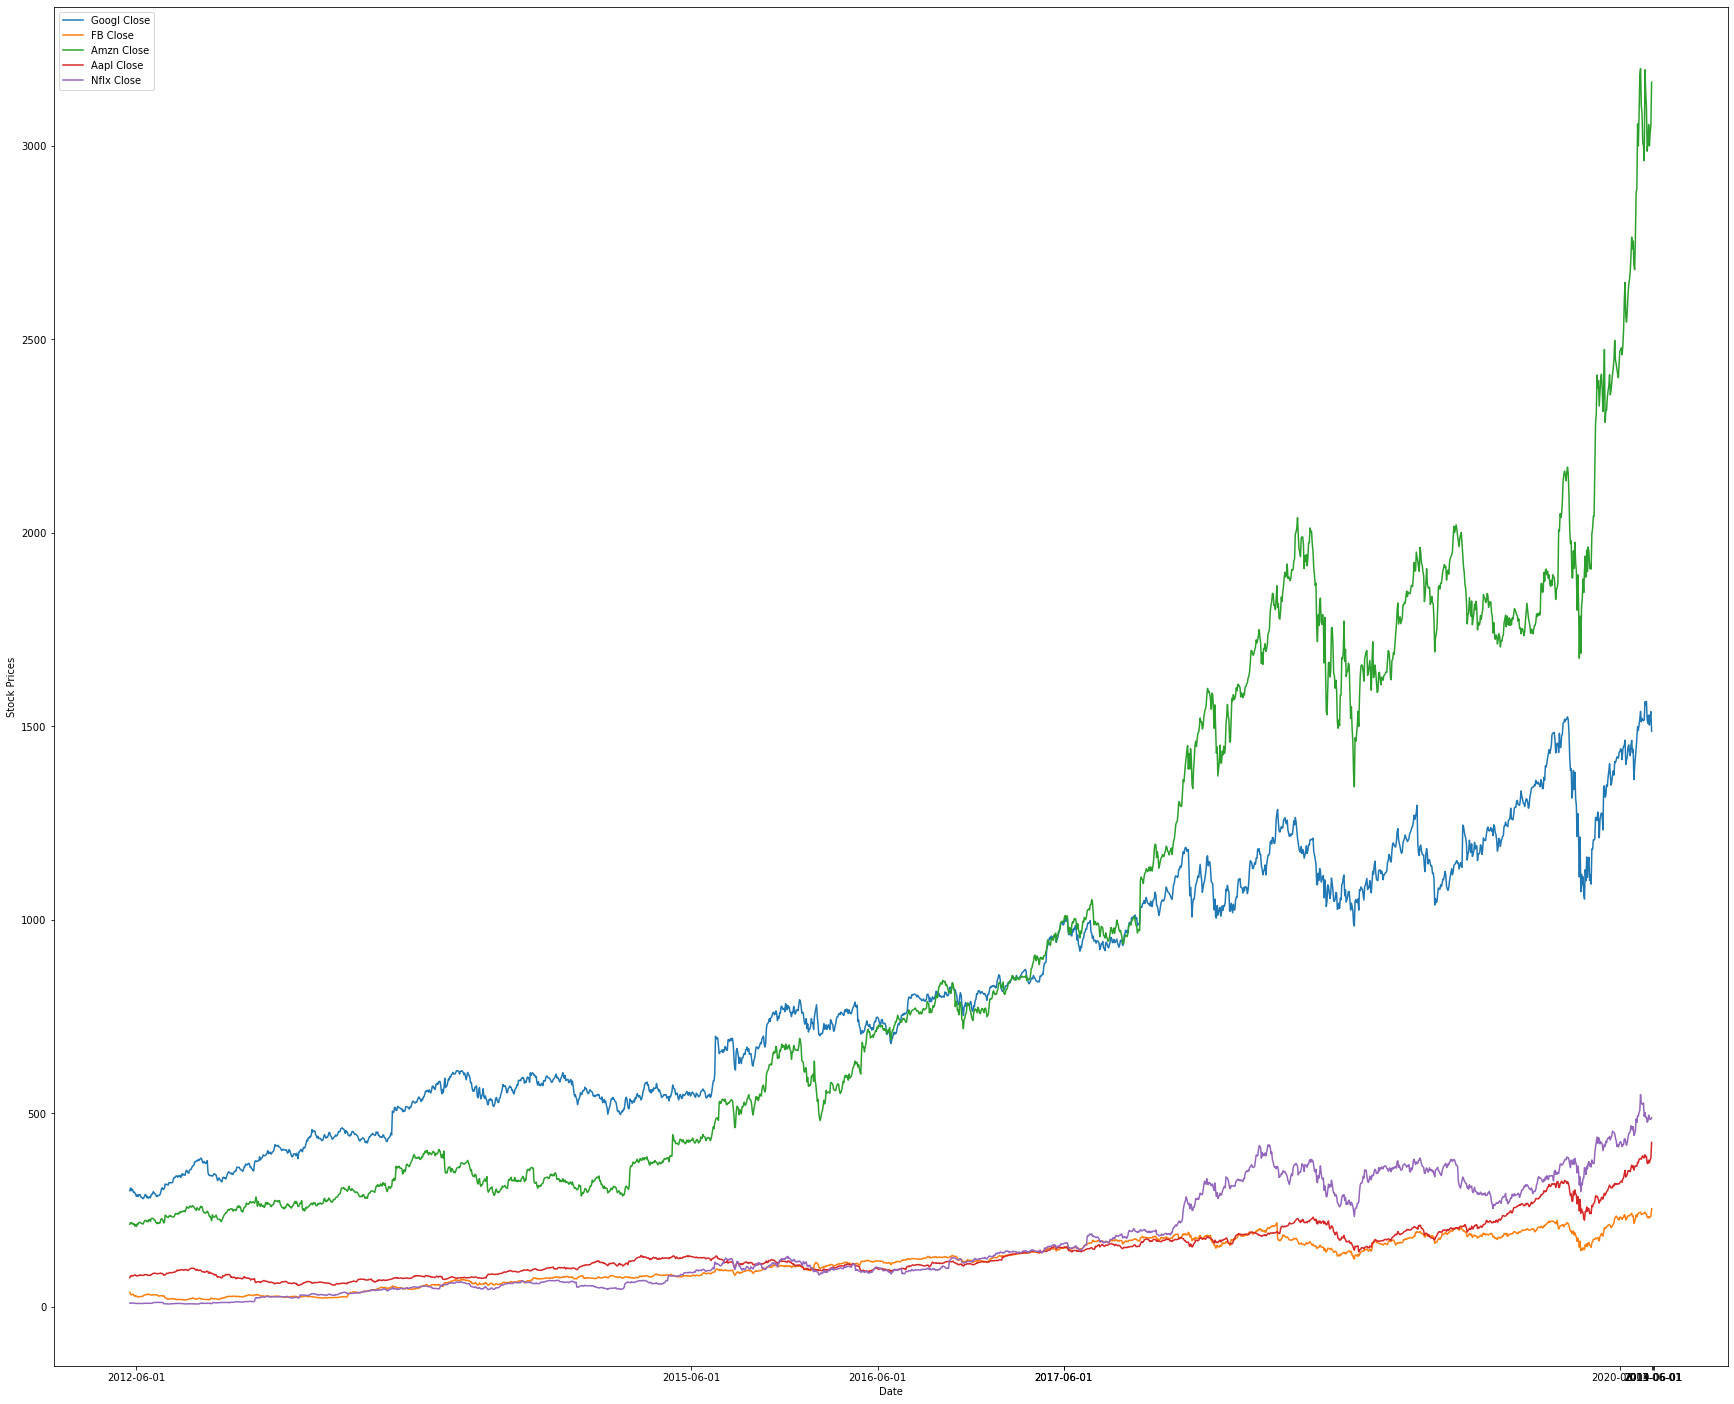

In [143]:
plt.figure(figsize=(30,25))
plt.plot('Date','Googl Close',data=df)
plt.plot('Date','FB Close',data=df)
plt.plot('Date','Amzn Close',data=df)
plt.plot('Date','Aapl Close',data=df)
plt.plot('Date','Nflx Close',data=df)
plt.xticks(['2012-06-01','2013-06-01','2014-06-01','2015-06-01','2016-06-01','2017-06-01','2017-06-01','2019-06-01','2020-06-01'])
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [141]:
#plt.figure(figsize=(30,25))
#plt.plot('Date','Close',data=googl_data_filtered,label='googl',color='red')
#plt.plot('Date','Close',data=fb_data_filtered,label='fb',color='orange')
#plt.plot('Date','Close',data=amzn_data_filtered,label='amzn',color='black')
#plt.plot('Date','Close',data=aapl_data_filtered,label='aapl',color='green')
#plt.plot('Date','Close',data=nflx_data_filtered,label='nflx',color='blue')
#plt.legend()
#plt.xlabel('Date')
#plt.ylabel('Amount in $')
#plt.title('FANNG Stocks')
#plt.tick_params(axis='x',which='both',bottom=True,top=False,labelbottom=False,length=500,width=500)
#plt.xticks([2012,2013,2014,2015,2016,2017,2018,2019,2020])
#plt.xticks(rotation=90)
#plt.show()
#this was a first attempt using separate dataframes 